In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import importlib
from psifr import fr
from mindstorm import statplot
from cfr import framework
from cfr import figures

model_dir = '/Users/morton/Dropbox/work/cmr_cfr/cfr'
data_file = os.path.join(model_dir, 'cfr_mixed_eeg.csv')
patterns_file = os.path.join(model_dir, 'cfr_patterns.hdf5')
fit_dir = os.path.join(model_dir, 'fits', 'v5')
fig_dir = '/Users/morton/Dropbox/work/cmr_cfr/cfr/figs/sim1'
os.makedirs(fig_dir, exist_ok=True)

plt.style.use('/Users/morton/.matplotlib/matplotlibrc')

## Load model fits

In [2]:
components = ['loc', 'cat', 'use', 'loc-cat', 'loc-use', 'cat-use', 'loc-cat-use']
models = [f'cmrs_fcf-{comp}' for comp in components]
model_names = ['I', 'C', 'D', 'IC', 'ID', 'CD', 'ICD']
res = framework.read_model_fits(fit_dir, models, model_names)

## Calculate AIC weights

In [3]:
temp = res.loc[['I', 'C', 'D']].copy()
temp = framework.model_comp_weights(temp, stat='aic')
temp.groupby(['model'])['waic'].agg(['mean', 'sem', 'min', 'max']).T.round(4)

model,C,D,I
mean,0.2097,0.0,0.7903
sem,0.0763,0.0,0.0763
min,0.0000,0.0,0.0000
max,1.0000,0.0,1.0000


In [4]:
temp = res.loc[['IC', 'ID', 'CD']].copy()
temp = framework.model_comp_weights(temp, stat='aic')
temp.groupby(['model'])['waic'].agg(['mean', 'sem', 'min', 'max']).T.round(4)

model,CD,IC,ID
mean,0.0,0.7661,0.2339
sem,0.0,0.0753,0.0753
min,0.0,0.0000,0.0000
max,0.0,1.0000,1.0000


In [5]:
res = framework.model_comp_weights(res, stat='aic')

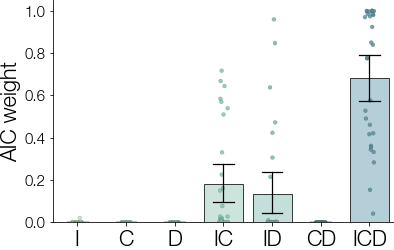

In [6]:
fig, ax = plt.subplots(figsize=(6, 4))
g = figures.plot_swarm_bar(
    data=res.reset_index(), x='model', y='waic', point_kind='strip', ax=ax
)
ax.set(ylabel='AIC weight');
fig.savefig(os.path.join(fig_dir, 'waic.pdf'));

In [7]:
np.count_nonzero(res.loc['IC', 'waic'] > res.loc['ICD', 'waic'])

7

In [8]:
np.count_nonzero(res.loc['ID', 'waic'] > res.loc['ICD', 'waic'])

3

## Context component weights

In [19]:
param = res.loc['ICD', ['wr_loc', 'wr_cat', 'wr_use']]
param.rename(columns={'wr_loc':'w_I', 'wr_cat':'w_C', 'wr_use':'w_D'}, inplace=True)
df = pd.melt(
    param.reset_index(), id_vars='subject', value_name='Weight', var_name='Component'
)

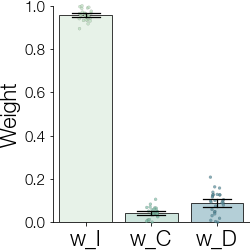

In [20]:
plt.rcParams.update({"text.usetex": False})
fig, ax = plt.subplots(figsize=(4, 4))
g = statplot.plot_swarm_bar(
    data=df.reset_index(),
    x='Component',
    y='Weight',
    point_kind='strip',
    point_kws={'clip_on': False},
    ax=ax,
)
ax.set(ylim=(0, 1), ylabel='Weight');
fig.savefig(os.path.join(fig_dir, 'weights.pdf'))

## Create a parameter table

In [6]:
importlib.reload(figures)
table = figures.create_model_table(fit_dir, models, model_names)
table.to_latex(os.path.join(fig_dir, 'parameters1.tex'), escape=False)
table

,I,C,D,IC,ID,CD,ICD
L_{FC},0.13 (0.01),0.75 (0.01),0.60 (0.03),0.10 (0.01),0.11 (0.01),0.73 (0.01),0.10 (0.01)
L_{CF},0.11 (0.01),0.80 (0.01),0.69 (0.01),0.09 (0.01),0.10 (0.01),0.75 (0.01),0.09 (0.01)
\phi_s,0.27 (0.07),0.08 (0.01),0.18 (0.02),0.04 (0.01),0.07 (0.01),0.05 (0.01),0.03 (0.01)
\phi_d,1.17 (0.19),0.41 (0.03),0.39 (0.07),1.26 (0.24),1.46 (0.26),0.35 (0.02),1.49 (0.25)
\beta_{\mathrm{enc}},0.72 (0.02),0.04 (0.00),0.08 (0.02),0.64 (0.02),0.66 (0.02),0.05 (0.01),0.62 (0.02)
\beta_{\mathrm{start}},0.67 (0.07),0.00 (0.00),0.03 (0.02),0.54 (0.07),0.66 (0.06),0.01 (0.01),0.54 (0.07)
\beta_{\mathrm{rec}},0.79 (0.02),0.96 (0.01),0.90 (0.05),0.86 (0.01),0.84 (0.01),0.94 (0.03),0.86 (0.01)
\theta_s,0.01 (0.00),0.01 (0.00),0.01 (0.00),0.01 (0.00),0.01 (0.00),0.01 (0.00),0.01 (0.00)
\theta_r,0.31 (0.01),0.31 (0.01),0.31 (0.01),0.31 (0.01),0.31 (0.01),0.31 (0.01),0.31 (0.01)
w_1,---,---,---,0.94 (0.00),0.83 (0.01),0.44 (0.03),0.96 (0.00)
